# Title : Titanic Dataset
### Author: Vaishnav Krishna P
## Intership : CodSoft
### Dataset Source : https://www.kaggle.com/datasets/yasserh/titanic-dataset
### Task:
* Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.


In [776]:
# importing necessory libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#ignoring incompactable issue warnings
import warnings
warnings.filterwarnings(action="ignore")

# Statistics library
import math
import statistics as stats
from scipy.stats import skew

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler

# Libaries for splitting the data set 
from sklearn.model_selection import train_test_split,KFold,cross_val_score

# importing the model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Libraries for the validation of the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [777]:
# Loading the datset 
# Importing dataset
df = pd.read_csv("Titanic-Dataset.csv")

DATA PREPROCESSING
1. CLEANING DATA 
2. DATA TRANSFORMATION
3. DATA REDUCTION

#### DATA CLEANING
* Data cleaning includes missing value handling,noises and outliers

In [778]:
# From EDA we understood the features having missing values.lets, handle missing values using various techniques.
# Age Missing values can be replaced with the median.
df["Age"].fillna(df["Age"].median(),inplace=True)

In [779]:
# Embarked Missing value can be replace with the most frequently occured label
df["Embarked"].fillna(stats.mode(df["Embarked"]),inplace=True)

Since the 70%+ values are missing we can remove the Cabin feature in later on stage.

#### DATA REDUCTION
* It includes removal of the constant,and irrelavant features.

In [780]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [781]:
# inthis data set : Name,PassengerId,Ticket are the constant features and Embarked is a noise since majority of the dataset is missing 
df.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True)

In [782]:
# Now lets analyse whether the dataset is clean from missing value or not 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### DATA TRANSFORMATION
* Encoding the categorical features.since the categorical features are not understandable by the model.

In [783]:
# Categorical features in the dataset 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical_features

['Sex', 'Embarked']

In [784]:
# categorical features dataframe 
df[categorical_features].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [785]:
# unique features
df["Sex"].unique(),df["Embarked"].unique()

(array(['male', 'female'], dtype=object), array(['S', 'C', 'Q'], dtype=object))

In [786]:
# Encoding the categorical features
df["Sex"] = df["Sex"].map({"male":1,"female":2})
df["Embarked"] = df["Embarked"].map({"S":1,"C":2,"Q":3})

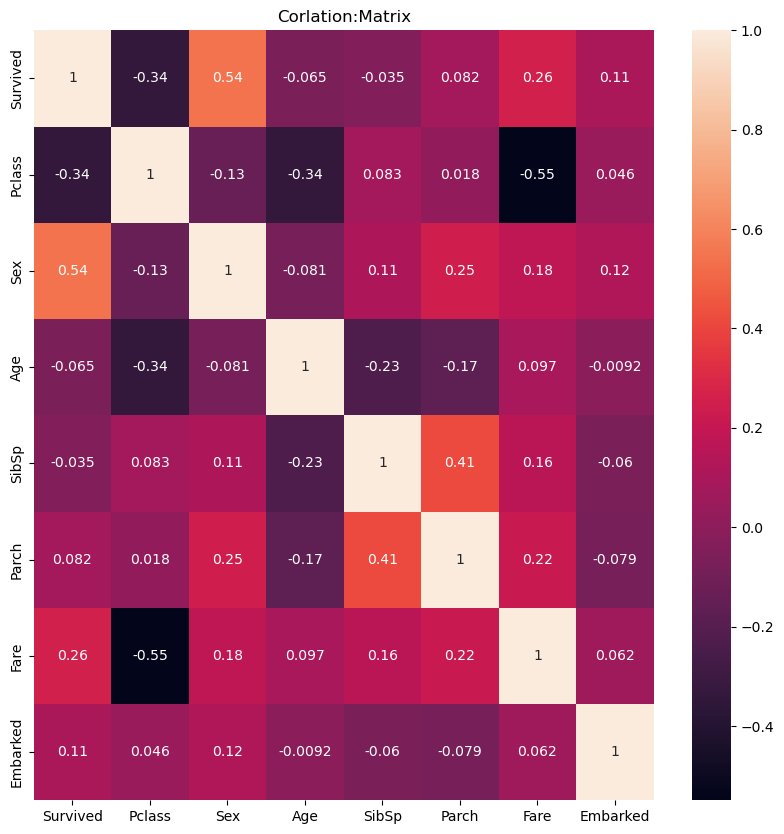

In [787]:
# Now lets analyse the corelation matrix
plt.figure(figsize=(10,10))
plt.title("Corlation:Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

* from the corelation matrix it is understood that multicolnear features are,
1. (SibSp,Parch - 0.41)
2. (Fare,Pcalss - 0.55)


### Logerthemic tranformation to Fare feature

In [788]:
skew(df["Fare"])

4.7792532923723545

In [789]:
# Sice the feature Fare is highly positively skewed.applying logerthemic transformation to reduce the skeweness
def fareEncoding(x):
    if x <= 0:
        return x
    else:
        return math.log(x)

In [790]:
# Applying Logerthemic transformation
df["Fare"] = pd.DataFrame(map(fareEncoding,df["Fare"]))

In [791]:
skew(df["Fare"])

0.4423624904982926

* So, the skewness of the Fare feature is reduced by applying the logerthemic Tranformation(4.779 - 0.44)

### Data reduction
* Based on the analysis of corelation Matrix

In [792]:
# Removing fare feature since, it is highly corelated with the passenger class
df.drop(columns=["Fare"],inplace=True)

### Discretization of Age feature

In [793]:
# Discretization of age features 
bins = [0,5,18,25,60,100]
labels = ["Baby","Child","Young","Mid-Aged","Old"]
df["Age"] = pd.cut(df["Age"],bins=bins,labels=labels)

In [794]:
# Encoding the age feature
df["Age"] = df["Age"].map({"Baby":1,"Child":2,"Young":3,"Mid-Aged":4,"Old":5})
df["Age"] = df["Age"].astype("int")

* so, the coreation with the target feature got increased since the age feature is discretized

### SPOT CHECK
* spot checking is conduction using the models such as Logistic regression,DecisonTreeClassifier,Random forest classfier,support vector michine,naive bais classifier.

In [795]:
labels = ["Logistic Regression","DecisionTreeClassifier","RandomForestClassifier","SVM","Naive Bais","KNeighborsClassifier"]
accuracy = []

# splitting the target feature 
X = df.drop(columns=["Survived"])
Y = df["Survived"]
kfold = KFold(n_splits = 10)

# Logistic Regression
model = LogisticRegression()
log_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(log_results.mean())

# DecisionTreeCalssifier
model = DecisionTreeClassifier()
dt_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(dt_results.mean())

# Logistic Regression
model = RandomForestClassifier()
rf_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(rf_results.mean())

# Logistic Regression
model = SVC()
svc_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(svc_results.mean())

# Logistic Regression
model = GaussianNB()
nb_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(nb_results.mean())

# Logistic Regression
model = KNeighborsClassifier()
knn_results = cross_val_score(model,X,Y,cv=kfold)
accuracy.append(knn_results.mean())


### ACCURACY COMPARISON OF SPOT CHECK

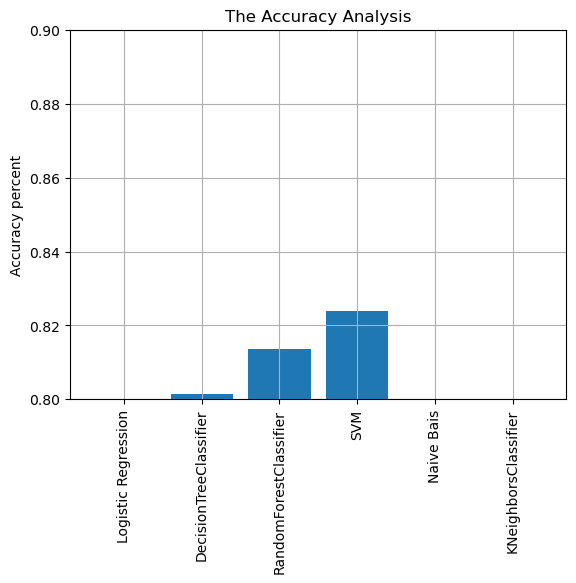

In [796]:
plt.title("The Accuracy Analysis")
plt.bar(labels,accuracy)
plt.ylabel("Accuracy percent")
plt.xticks(rotation=90)
plt.ylim(0.8,0.9)
plt.grid(True)
plt.show()

* In the spot check it is understood that,SVM(support vector michine) has worked very well.

### SPLITTING THE DATASET

In [797]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [798]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.333,shuffle=True,random_state=42)

In [799]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((594, 6), (297, 6), (594,), (297,))

### TRAINING THE MODEL 

In [800]:
# Training of the Model using SVM
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### TESTING THE MODEL

In [801]:
# accuracy score 
accuracy_score(y_pred,y_test)

0.8417508417508418

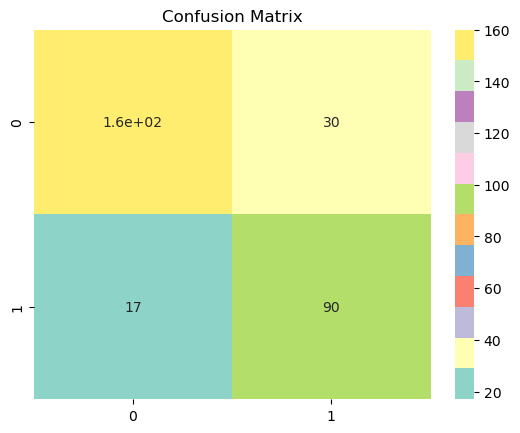

In [802]:
# Confusion_matrix 
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap="Set3")
plt.show()

In [803]:
# classification report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       190
           1       0.75      0.84      0.79       107

    accuracy                           0.84       297
   macro avg       0.83      0.84      0.83       297
weighted avg       0.85      0.84      0.84       297



* So,Completed with  84 percent accuracy using the Model SVM(Support Vector Michine)